In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
df = pd.read_csv('../data/서울시 코로나19 확진자 현황.csv', encoding='euc-kr')
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,22183,2021-01-12,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
1,22182,2021-01-13,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2,22181,2021-01-13,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
3,22180,2021-01-13,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
4,22179,2021-01-14,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22178,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
22179,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
22180,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
22181,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y


In [3]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22183 entries, 0 to 22182
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      22183 non-null  int64  
 1   확진일     22183 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      22183 non-null  object 
 6   여행력     712 non-null    object 
 7   접촉력     22183 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      16754 non-null  object 
 10  이동경로    19563 non-null  object 
 11  등록일     22183 non-null  object 
 12  수정일     22183 non-null  object 
 13  노출여부    22183 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.4+ MB


# 문제1 : 2021년 서울시 코로나19 확진자의 접촉력 유형 중 구치소, 교도소 감염인 비율

In [5]:
df_date = df.set_index('확진일')
df_date

,연번,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
확진일,,,,,,,,,,,,,
2021-01-12,22183,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22182,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22181,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22180,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-14,22179,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,5,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
2020-01-30,4,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
2020-01-30,3,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y


In [6]:
# datetime 형으로 변환

df_date.index = pd.to_datetime(df_date.index, format='%Y-%m-%d')
df_date.index 

DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-13', '2021-01-13',
               '2021-01-14', '2020-12-22', '2020-12-27', '2021-01-13',
               '2021-01-13', '2021-01-14',
               ...
               '2020-02-05', '2020-02-05', '2020-02-02', '2020-01-31',
               '2020-01-31', '2020-01-31', '2020-01-30', '2020-01-30',
               '2020-01-30', '2020-01-24'],
              dtype='datetime64[ns]', name='확진일', length=22183, freq=None)

In [7]:
# 2021년 데이터 추출

df_date_2021 = df_date['2021':]
df_date_2021

,연번,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
확진일,,,,,,,,,,,,,
2021-01-12,22183,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22182,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22181,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-13,22180,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-14,22179,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,19365,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-01,19364,NaN,NaN,NaN,동작구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2021-01-01,19363,NaN,NaN,NaN,금천구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y


In [8]:
# 코로나19 확진자의 접촉력 유형 종류 보기

df_date_2021['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '타시도 확진자 접촉', '병원 및 요양시설',
       '관악구 소재 종교시설 관련', '해외유입', '동대문구 소재 역사 관련', '서대문구 소재 의료기관 관련',
       '동부구치소 관련', '성동구 소재 거주시설/요양시설 관련', '강북구 소재 아동관련 시설',
       '서대문구 소재 종교시설 관련', '강동구 소재 요양병원 관련', '양천구 소재 요양시설Ⅱ 관련', '강동구 가족관련',
       '강남구 소재 직장 관련', '강동구 가족 관련', '구로구 소재 요양병원/요양원 관련',
       '영등포구 소재 장례식장 관련', '은평구 소재 병원관련', '광진구 소재 요양시설 관련', '강북구 소재 교회 관련',
       '동대문구 소재 어르신복지시설 관련', '종로구 사우나 관련', '송파구 소재 장애인 거주시설 관련',
       '종로구 소재 요양시설 관련', '강남구 소재 택시회사 관련', '마포구 소재 종교시설',
       '마포구 소재 보험회사 관련', '기타확진자 접촉', '강동구 지인모임 관련', '중랑구 소재 종교시설 관련',
       '남부교도소 관련', '강남구 콜센터Ⅱ 관련', '노원구 소재 병원 관련',
       '타시도 확진자 접촉(경기이천시물류센터관련)', '양천구 소재 요양시설 관련', '강서구 교회 관련',
       '서초구 소재 종교시설 관련', '영등포 소재 의료기관 관련', '기타 확진자 접촉종',
       '성북구 종교시설(장암교회) 관련', '구로구 소재 병원 관련'], dtype=object)

In [9]:
# 코로나19 확진자의 접촉력 유형 총 43개 

df_date_2021['접촉력'].unique().size

43

In [10]:
# '접촉력'이 구치소, 교도소인 행의 개수 세기

dongbu_2021 = df_date_2021[df_date_2021['접촉력'] == '동부구치소 관련'].shape[0]
print('동부구치소 감염 :', dongbu_2021, '명')
nambu_2021 = df_date_2021[df_date_2021['접촉력'] == '남부교도소 관련'].shape[0]
print('남부교도소 감염 :', nambu_2021, '명')

동부구치소 감염 : 235 명
남부교도소 감염 : 1 명


In [11]:
print( '2021년 서울시 코로나19 확진자의 접촉력 유형 중 구치소, 교도소 감염인 비율 :' 
      , round(((dongbu_2021 + nambu_2021) / df_date_2021.shape[0])*100, 2), '%')

2021년 서울시 코로나19 확진자의 접촉력 유형 중 구치소, 교도소 감염인 비율 : 8.44 %


### <분석 결과>
#### 1. 최근 코로나 집단감염 사태가 발생한 교도소와 구치소에 대해 2021.01.1~2021.01.14 기간 동안 서울시 코로나19 총 확진자 중 몇 % 차지하고 있는지를 확인하고자 함
#### 2. 분석결과, 구치소와 교도소 감염 비율이 8.44%로 나타났는데, 이는 코로나19 확진자의 접촉력 유형 총 43개 중 구치소와 교도소 감염이 총 확진자의 대략 1/10 정도를 차지하고 있는 만큼 경각심을 기울일 필요가 있음
##### ==================================================================================

# 문제2 : 2021년 서울시 코로나19 확진자의 접촉력 유형별 감염 빈도

In [12]:
# '접촉력' 값의 개수 세기 

corona_type = pd.DataFrame(df_date_2021['접촉력'].value_counts())
corona_type.columns = ['감염 빈도']
corona_type

,감염 빈도
기타 확진자 접촉,1232
감염경로 조사중,821
동부구치소 관련,235
타시도 확진자 접촉,111
해외유입,65
양천구 소재 요양시설Ⅱ 관련,36
구로구 소재 요양병원/요양원 관련,25
기타확진자 접촉,25
강북구 소재 아동관련 시설,19
성동구 소재 거주시설/요양시설 관련,19


In [13]:
# 감염빈도가 높은 상위 5개의 유형

corona_type.nlargest(5, columns='감염 빈도', keep='all')

,감염 빈도
기타 확진자 접촉,1232
감염경로 조사중,821
동부구치소 관련,235
타시도 확진자 접촉,111
해외유입,65


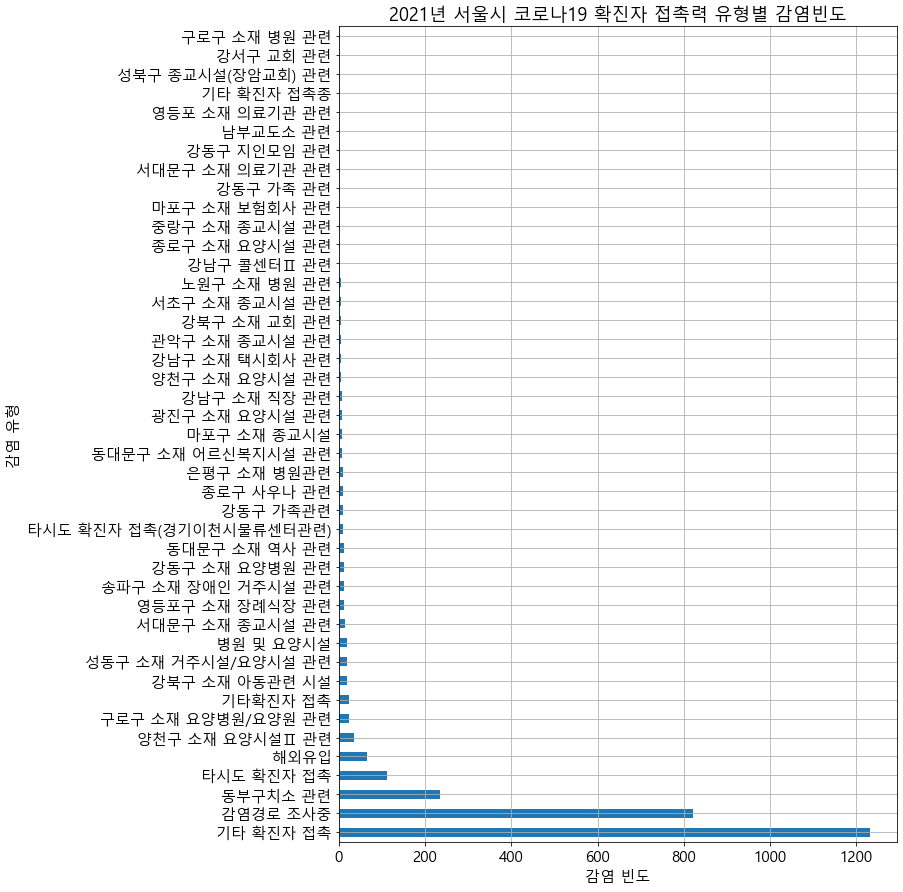

In [14]:
corona_type.plot(kind='barh',
        figsize=(10, 15), 
        title='2021년 서울시 코로나19 확진자 접촉력 유형별 감염빈도', 
        legend=False, 
        grid=True)

plt.xlabel("감염 빈도")
plt.ylabel("감염 유형")
plt.show()

### <분석 결과>
#### 1. 기타 확진자 접촉이 압도적으로 높은 것으로 보아 특정한 장소로 추릴 수 없는 확진자가 많음을 알 수 있음
#### 2. 감염경로 조사중인 확진자가 많은 만큼 감염 경로 파악이 최대한 빨리 이루어져야 함을 알 수 있음
#### 3. 동부구치소 감염이 다른 특정 장소 감염 보다 두드러지게 많음을 알 수 있음
##### ==================================================================================

# 문제3 : 2021년 서울시 코로나19 확진자의 지역별 감염빈도

In [15]:
corona_gu = pd.DataFrame(df_date_2021['지역'].value_counts())
corona_gu.columns = ['감염 빈도']
corona_gu

,감염 빈도
기타,290
송파구,144
강서구,131
동작구,128
강북구,122
은평구,120
영등포구,119
타시도,114
동대문구,113
성북구,113


In [16]:
corona_gu.nlargest(5, columns='감염 빈도', keep='all')

,감염 빈도
기타,290
송파구,144
강서구,131
동작구,128
강북구,122


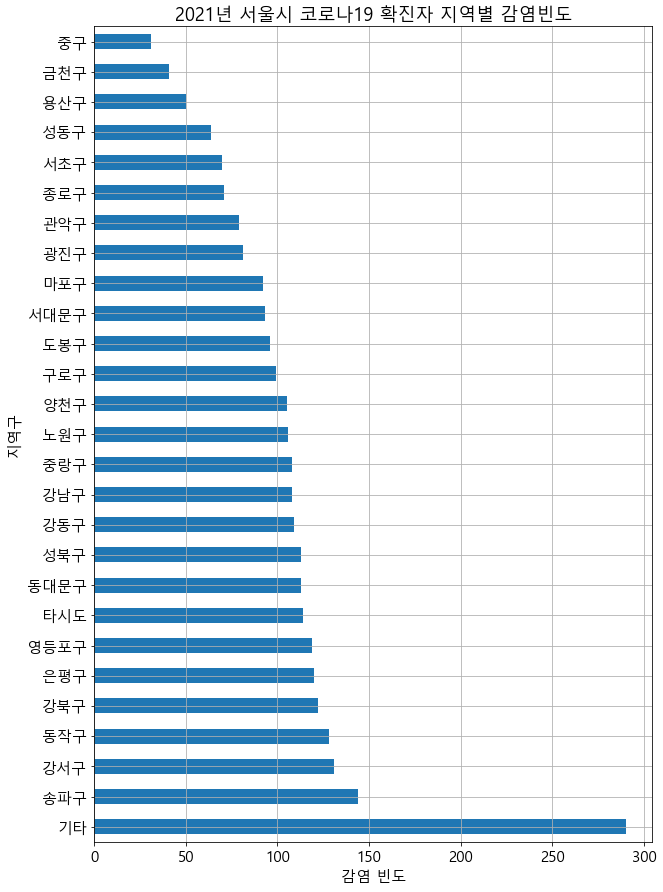

In [17]:
corona_gu.plot(kind='barh',
        figsize=(10, 15), 
        title='2021년 서울시 코로나19 확진자 지역별 감염빈도', 
        legend=False,       
        grid=True)

plt.xlabel("감염 빈도")
plt.ylabel("지역구")
plt.show()

In [18]:
# 송파구 접촉력 유형 살펴보기

df_date_2021[df_date_2021['지역'] == '송파구']['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '병원 및 요양시설', '해외유입', '타시도 확진자 접촉',
       '동부구치소 관련', '송파구 소재 장애인 거주시설 관련', '마포구 소재 보험회사 관련', '기타확진자 접촉',
       '강동구 지인모임 관련', '타시도 확진자 접촉(경기이천시물류센터관련)'], dtype=object)

### <분석 결과>
#### 1. '기타'가 많이 나온 것은 확진자의 거주지에 대한 정보를 밝힐 수 없거나 타시도인 경우가 아닐까 추측함 - 데이터를 살펴보니 '동부구치소 관련', '요양시설 관련' 등이 기타로 분류되어 있었음
#### 2. 송파구 접촉력 유형을 살펴보면, 다양한 장소에서 확진자가 나왔음을 알 수 있음
##### ==================================================================================

# 문제4 : 2021년 서울시 코로나19 일자별 확진자 수

In [19]:
corona_day_count = pd.DataFrame(df_date_2021.index.value_counts())
corona_day_count.columns = ['확진자 수']
corona_day_count = corona_day_count.sort_index()
corona_day_count

,확진자 수
2021-01-01,248
2021-01-02,191
2021-01-03,330
2021-01-04,194
2021-01-05,260
2021-01-06,298
2021-01-07,191
2021-01-08,187
2021-01-09,186
2021-01-10,140


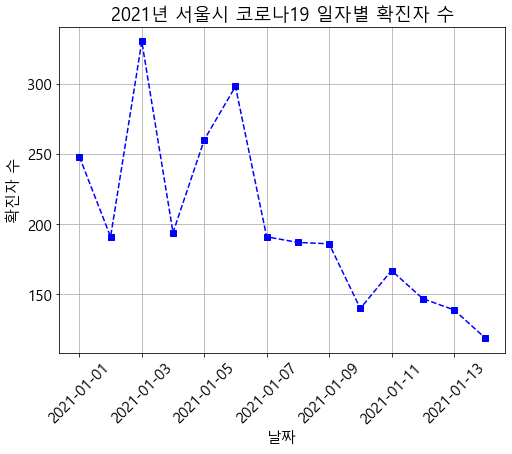

In [20]:
plt.plot(corona_day_count.index, corona_day_count['확진자 수'],'bs--')
plt.xlabel('날짜')
plt.ylabel('확진자 수')
plt.title('2021년 서울시 코로나19 일자별 확진자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### <분석 결과>
#### 1. 연초에 확진자가 많았고, 특히, 1월 3일에는 전날에 비해 폭발적으로 급증했음을 알 수 있음
#### 2. 2021년 1월 7일 이후로는 확진자가 점점 감소하는 추세임을 알 수 있음
##### ==================================================================================

# 문제5 : 2020년 서울시 코로나19 월별 확진자 수

In [21]:
df_date_2020 = df_date['2020']
df_date_2020

,연번,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
확진일,,,,,,,,,,,,,
2020-12-22,22178,NaN,NaN,NaN,구로구,NaN,타지역 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2020-12-27,22177,NaN,NaN,NaN,금천구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2020-12-25,21919,NaN,NaN,NaN,동작구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-15 10:04,2021-01-15 10:04,Y
2020-12-18,21918,NaN,NaN,NaN,기타,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
2020-12-18,21917,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,5,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
2020-01-30,4,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y
2020-01-30,3,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y


In [22]:
df_date_2020['month'] = df_date_2020.index.month
df_date_2020

C:\Users\master16\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,연번,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,month
확진일,,,,,,,,,,,,,,
2020-12-22,22178,NaN,NaN,NaN,구로구,NaN,타지역 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y,12
2020-12-27,22177,NaN,NaN,NaN,금천구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y,12
2020-12-25,21919,NaN,NaN,NaN,동작구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-15 10:04,2021-01-15 10:04,Y,12
2020-12-18,21918,NaN,NaN,NaN,기타,NaN,기타 확진자 접촉,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y,12
2020-12-18,21917,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-15 10:04,2021-01-15 10:04,Y,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,5,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y,1
2020-01-30,4,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y,1
2020-01-30,3,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,이동경로 공개기간 경과,2021-01-14 11:16,2021-01-14 11:16,Y,1


In [23]:
df_date_2020_count = df_date_2020.groupby('month').count()
df_date_2020_count = df_date_2020_count[['지역', '여행력']]
df_date_2020_count.columns = ['총 확진자 수', '여행력이 있는 확진자 수']
df_date_2020_count

,총 확진자 수,여행력이 있는 확진자 수
month,,
1,7,3
2,80,9
3,391,129
4,156,111
5,229,25
6,459,23
7,281,39
8,2415,51
9,1306,23


In [24]:
df_date_2020_count['여행력 비율(%)'] = round((df_date_2020_count['여행력이 있는 확진자 수'] / df_date_2020_count['총 확진자 수'])*100, 2)
df_date_2020_count

,총 확진자 수,여행력이 있는 확진자 수,여행력 비율(%)
month,,,
1,7,3,42.86
2,80,9,11.25
3,391,129,32.99
4,156,111,71.15
5,229,25,10.92
6,459,23,5.01
7,281,39,13.88
8,2415,51,2.11
9,1306,23,1.76


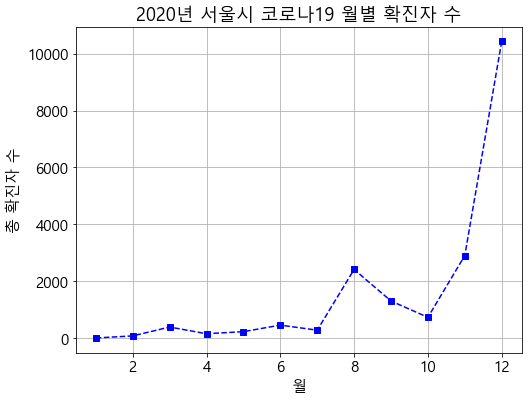

In [25]:
plt.plot(df_date_2020_count.index, df_date_2020_count['총 확진자 수'],'bs--')
plt.xlabel('월')
plt.ylabel('총 확진자 수')
plt.title('2020년 서울시 코로나19 월별 확진자 수')
plt.grid(True)
plt.show()

### <분석 결과>
#### 1. 2020년 한 해 동안 월별 확진자 수를 살펴본 결과, 12월에 확진자가 급증(코로나 3차 대유행)했음을 알 수 있는데 따라서 연말에 보다 강화된 거리두기가 시행되었음을 그래프를 통해 시각적으로 확인할 수 있음
#### 2. 8월달에 확진자가 눈에 띄게 늘어난 이유는 8.15 광화문집회와 사랑제일교회 관련 감염으로 보고 있고, 8월달을 코로나 2차 대유행으로 분류하고 있음
##### ==================================================================================

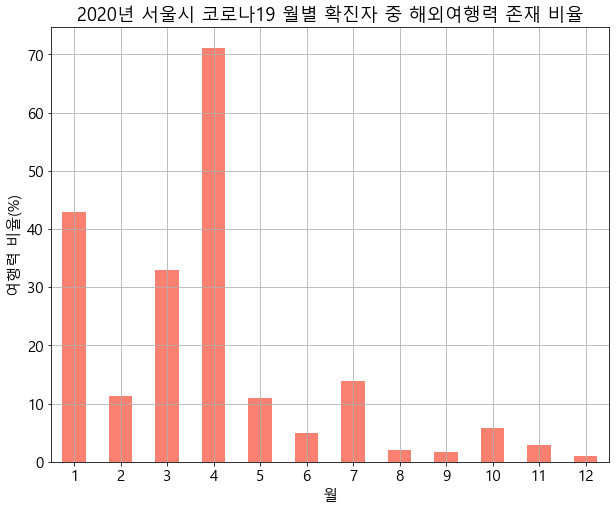

In [26]:
df_date_2020_count['여행력 비율(%)'].plot(kind='bar', 
        figsize=(10, 8), 
        title='2020년 서울시 코로나19 월별 확진자 중 해외여행력 존재 비율', 
        legend=False, 
        grid=True, 
        rot=0,
        color='salmon')
plt.xlabel("월")
plt.ylabel("여행력 비율(%)")
plt.show()

### <분석 결과>
#### 1. 연초에 해외 여행력 존재 비율이 높아지만, 해외 입국 자가격리 등으로 해외로 유입된 감염은 점차 줄어들었음을 알 수 있음
#### 2. 2020년 4월에는 서울시 코로나 확진자의 약 70%가 여행력이 존재함을 알 수 있음
##### ==================================================================================